In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("mamographic.csv",sep=',', na_values=["?"])
print(file.tail())

     BI-RADS   Age  Shape  Margin  Density  Severity
956      4.0  47.0    2.0     1.0      3.0         0
957      4.0  56.0    4.0     5.0      3.0         1
958      4.0  64.0    4.0     5.0      3.0         0
959      5.0  66.0    4.0     5.0      3.0         1
960      4.0  62.0    3.0     3.0      3.0         0


In [19]:
print(file.isnull().values.any())

True


In [20]:
print(file.describe())

          BI-RADS         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.296142   55.487448    2.721505    2.796276    2.910734    0.463059
std      0.706291   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max      6.000000   96.000000    4.000000    5.000000    4.000000    1.000000


In [21]:
file.columns[file.isnull().any()]

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density'], dtype='object')

In [26]:
file.dropna(inplace=True)
file.reindex()
file.count()

BI-RADS     830
Age         830
Shape       830
Margin      830
Density     830
Severity    830
dtype: int64

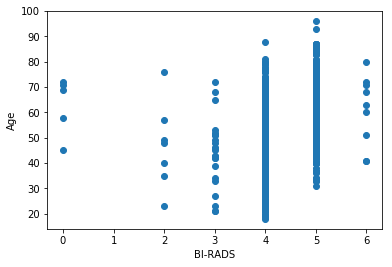

In [29]:
import matplotlib.pyplot as plt
C

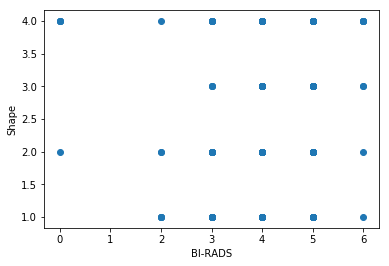

In [30]:
plt.scatter(file['BI-RADS'],file['Shape'])
plt.xlabel('BI-RADS')
plt.ylabel('Shape')
plt.show()

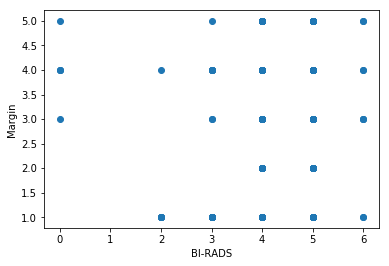

In [32]:
plt.scatter(file['BI-RADS'],file['Margin'])
plt.xlabel('BI-RADS')
plt.ylabel('Margin')
plt.show()

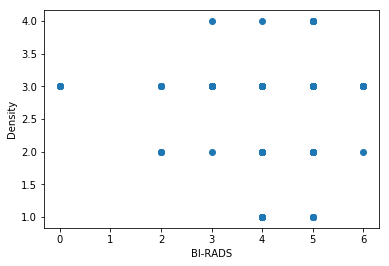

In [33]:
plt.scatter(file['BI-RADS'],file['Density'])
plt.xlabel('BI-RADS')
plt.ylabel('Density')
plt.show()

In [40]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2)
features_train=train[['BI-RADS','Age','Shape','Margin','Density']]
features_test = test[['BI-RADS','Age','Shape','Margin','Density']]
labels_train = train.Severity
labels_test = test.Severity
print(train.shape)
print(test.shape)
print(labels_test.head())

(664, 6)
(166, 6)
938    0
919    0
77     0
864    1
905    0
Name: Severity, dtype: int64


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2)]
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.807228915663
Accuracy: 0.825301204819
Accuracy: 0.819277108434
Accuracy: 0.83734939759
Accuracy: 0.825301204819
Accuracy: 0.777108433735
Accuracy: 0.843373493976
Accuracy: 0.825301204819
Accuracy: 0.831325301205
Accuracy: 0.795180722892
Accuracy: 0.753012048193
